# Enrichment
***
## Learning Objectives
- Understand the concept of enrichment
- Learn about joining dataframes
- Learn about the different types of joins

## Links

## Additional Material


## Sources
- [SQL Joins](https://www.w3schools.com/sql/sql_join.asp)
- [Indexes in Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)
- [Join in Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html)
- [Merge and Join differences](https://g.co/bard/share/219948ee80d0)


## Merge
Imagine you have two data frames: 

In [23]:
import pandas as pd

orders_data = {
    'order_id': [101, 102, 103, 104],
    'customer_id': ['A', 'B', 'A', 'C'],
    'order_total': [50, 75, 60, 90]
}

orders = pd.DataFrame(orders_data)
orders

order_id customer_id  order_total
0       101           A           50
1       102           B           75
2       103           A           60
3       104           C           90

And

In [24]:

# Sample customers DataFrame
customers_data = {
    'customer_id': ['A', 'B', 'C', 'D'],
    'customer_name': ['Alice', 'Bob', 'Charlie', 'David']
}
customers_df = pd.DataFrame(customers_data)
customers_df

customer_id customer_name
0           A         Alice
1           B           Bob
2           C       Charlie
3           D         David

Can you tell what's the common column in both these sets? It makes sense to combine them using the `customer_id` column. Let's do that using the `merge` function from `pandas`:

```python
merged = pd.merge(customers_df, orders, on='customer_id', how='inner')
```


In [25]:
merged = pd.merge(customers_df, orders, on='customer_id', how='inner')

print(merged)

  customer_id customer_name  order_id  order_total
0           A         Alice       101           50
1           A         Alice       103           60
2           B           Bob       102           75
3           C       Charlie       104           90


The two datasets are combined. The arguments for the `merge()` method are:
* `left`: the left DataFrame
* `right`: the right DataFrame
* `on`: the column(s) to join on. If not specified, and no other join keys given, will use the intersection of the column names in `left` and `right` as the join keys.
* `left_on`: the column(s) to use from the left DataFrame as the join key(s)
* `right_on`: the column(s) to use from the right DataFrame as the join key(s)
* `left_index`: if `True`, use the index (row labels) from the left DataFrame as its join key(s). If specified, `left_on` must be `None`.
* `right_index`: if `True`, use the index (row labels) from the right DataFrame as its join key(s). If specified, `right_on` must be `None`.
* `how`: the type of join to perform. Possible values are: `'left'`, `'right'`, `'outer'`, `'inner'`. Defaults to `'inner'`.
* `suffixes`: a tuple of strings to append to the column names of the overlapping columns in the left and right DataFrames, respectively. Defaults to `('_x', '_y')`.

For our purpose, we use `left`, `right`, `on`, and `how` arguments. We will use the `left` and `right` arguments to specify the DataFrames we want to join, the `on` argument to specify the column(s) to join on, and the `how` argument to specify the type of join to perform.

`on` is used to tell `merge()` which column(s) can be used to combine the datasets. Normally, the columns names are the same, but it doesn't need to be. Think of vlookup`s in a spreadsheet program - you're basically performing a join when you use vlookup. 

`how` is used to tell `merge()` what type of join to perform. The default is an inner join, which is what we want. An inner join will only keep rows where the join key(s) are present in both datasets. You get 4 types of joins: 
* Inner join: only keep rows where the join key(s) are present in both datasets

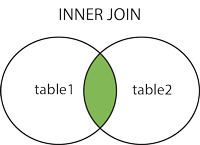

* Left join: keep all rows from the left dataset, and only keep rows from the right dataset where the join key(s) are present in both datasets

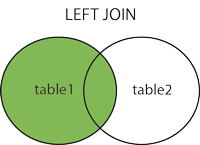

* Right join: keep all rows from the right dataset, and only keep rows from the left dataset where the join key(s) are present in both datasets

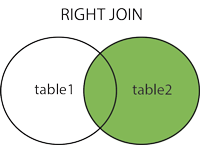

* Outer join: keep all rows from both datasets

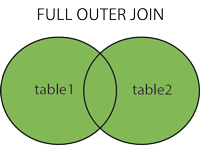

Here is a left join example:

In [26]:
import pandas as pd

# Sample orders DataFrame
orders_data = {
    'order_id': [101, 102, 103, 104],
    'customer_id': ['A', 'B', 'A', 'C'],
    'order_total': [50, 75, 60, 90]
}
orders_df = pd.DataFrame(orders_data)

# Sample customers DataFrame
customers_data = {
    'customer_id': ['A', 'B', 'C', 'D'],
    'customer_name': ['Alice', 'Bob', 'Charlie', 'David']
}
customers_df = pd.DataFrame(customers_data)

# Perform left join based on 'customer_id'
result_df = pd.merge(orders_df, customers_df, on='customer_id', how='left')

print(result_df)


   order_id customer_id  order_total customer_name
0       101           A           50         Alice
1       102           B           75           Bob
2       103           A           60         Alice
3       104           C           90       Charlie


We may want only the customers that have orders. Notice that `David` (or `customer_id` `D`) does not have an order. There are 4 rows in the `customers` dataframe and 3 in `order_data`. That is why the result of the merge is 3 rows. 

We can swap it around - asking for all customers - if they have a order or not - by using a `right join`:

In [27]:
result_df = pd.merge(orders_df, customers_df, on='customer_id', how='right')

print(result_df)

   order_id customer_id  order_total customer_name
0     101.0           A         50.0         Alice
1     103.0           A         60.0         Alice
2     102.0           B         75.0           Bob
3     104.0           C         90.0       Charlie
4       NaN           D          NaN         David


Notice the last row. David has no orders. `order_id` and `order_total` is `NaN` - not a number. This is because David has no orders. 

`OUTER JOIN` is even less restrictive than `LEFT JOIN` or `RIGHT JOIN`. It will return all rows from both tables, even if there is no match. Using the same example as above, the result would look like this:

In [28]:
result_df = pd.merge(orders_df, customers_df, on='customer_id', how='outer')

print(result_df)

   order_id customer_id  order_total customer_name
0     101.0           A         50.0         Alice
1     103.0           A         60.0         Alice
2     102.0           B         75.0           Bob
3     104.0           C         90.0       Charlie
4       NaN           D          NaN         David


Since there are no orders without customers, the result is the same as a right join. Imagine the the dataset had orders without customers, though: 

In [29]:
# Add an order to the data

# Create a new order
new_order = {
    'order_id': 105,

    'order_total': 120
}
# pd.concat([orders_df, pd.DataFrame([new_order])], ignore_index=True)
orders_df = orders_df.append(new_order, ignore_index=True)
orders_df

/var/folders/7m/3ln23gc103l4l5pk5vhzh6n00000gp/T/ipykernel_26368/2474794408.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orders_df = orders_df.append(new_order, ignore_index=True)


order_id customer_id  order_total
0       101           A           50
1       102           B           75
2       103           A           60
3       104           C           90
4       105         NaN          120

Join the datasets again: 

In [30]:
result_df = pd.merge(orders_df, customers_df, on='customer_id', how='outer')

print(result_df)

   order_id customer_id  order_total customer_name
0     101.0           A         50.0         Alice
1     103.0           A         60.0         Alice
2     102.0           B         75.0           Bob
3     104.0           C         90.0       Charlie
4     105.0         NaN        120.0           NaN
5       NaN           D          NaN         David


Now we see 5 rows. `order_id` `5` has no `customer_name`

## Join
Why was the previous section called **MERGE** - because there is also a **JOIN**. The difference is that **MERGE** is used to combine dataframes based on the index, while **JOIN** is used to combine dataframes based on the columns.

